# Project 2 EDA

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

dataset_location = 'https://lms.skillfactory.ru/assets/courseware/v1/425d6864db937e4ebabc972e581769ab/asset-v1:Skillfactory+DST-WEEKLY-2.0+08JULY2020+type@asset+block/stud_math.csv'

children = pd.read_csv(dataset_location)
display(children.head())
print(f'children dataset has {children.shape[0]} rows and {children.shape[1]} columns.')
children.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


children dataset has 395 rows and 30 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64

In [197]:
# let's write a function for a quick handling of 
# NaN's in columns with nomonative data:

def fillna_cat(datafr, column_name):
# the idea is to extract all categories, count their ratio and 
# fill NaN's kind-of-randomly, with the same ratio:

    # checking how many cells we should fill:
    nan_len = len(datafr.loc[datafr[column_name].isna(), column_name])

    # Generating a dict with values ratios:
    cat_head_list = list(datafr[column_name].dropna().unique())
    dict_of_ratios = {}
    for a in cat_head_list:
        dict_of_ratios[a] = round((datafr[column_name].value_counts().loc[a])/datafr[column_name].count(), 6)
        
    probability = list(dict_of_ratios.values())
    
    # correcting rounding error
    probability[-1] = round(1 - sum(probability[:-1]), 6)
    
    # creating a random filled list with the same values ratio as in original Series:
    random_list = np.random.choice(list(dict_of_ratios.keys()), size=nan_len, p=probability)

    # assigning random_adress list to the address cells with NaN's:
    datafr.loc[datafr[column_name].isna(), column_name] = random_list
    

# 1. Первичный анализ данных.

In [198]:
children.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [199]:
# Transforming to a lowercase/single word column name
children.columns = [a.lower() for a in list(children.columns)]
children = children.rename(columns={'studytime, granular': 'studytime_gr'}, index={'ONE': 'one'})
print(children.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_gr', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'health', 'absences', 'score'],
      dtype='object')


In [200]:
# I'm lazy, so let's call each new collumn by iteration:
child_iter = iter(list(children.columns))

## School

In [201]:
column = next(child_iter)
print(column)
display(children[column].value_counts())
children[[column]].info()

school


GP    349
MS     46
Name: school, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


### 2 schools, no empty cells, cool.

## Sex

In [202]:
column = next(child_iter)
print(column)
display(children[column].value_counts())
children[[column]].info()

sex


F    208
M    187
Name: sex, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


### 2 sexes, no empty cells, cool.

## Age

In [203]:
column = next(child_iter)
print(column)
display(children[column].value_counts())
children[[column]].info()

age


16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 6.2 KB


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

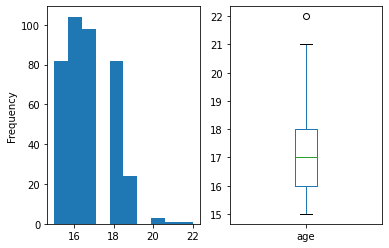

In [204]:
# distribution and otliers check
figure, axes = plt.subplots(1, 2)
children.age.plot(ax=axes[0], kind='hist')
children.age.plot(ax=axes[1], kind='box')
children.age.describe()

Distribution is normal(ish), scewed to the left, no empty cells, but there is one outlier.
Let's find it.

In [205]:
Q1 = children.age.quantile(0.25)
Q3 = children.age.quantile(0.75)
IQR = Q3 - Q1
children[(children.age > Q3 + 1.5*IQR) | (children.age < Q1 - 1.5*IQR)]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,studytime_gr,higher,internet,romantic,famrel,freetime,goout,health,absences,score
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,...,-3.0,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0


Here you are, overgrown blockhead. Let's kick him out!

In [206]:
children = children[(children.age <= Q3 + 1.5*IQR) & (children.age >= Q1 - 1.5*IQR)]
children.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        394 non-null    object 
 1   sex           394 non-null    object 
 2   age           394 non-null    int64  
 3   address       377 non-null    object 
 4   famsize       367 non-null    object 
 5   pstatus       349 non-null    object 
 6   medu          391 non-null    float64
 7   fedu          370 non-null    float64
 8   mjob          375 non-null    object 
 9   fjob          358 non-null    object 
 10  reason        377 non-null    object 
 11  guardian      363 non-null    object 
 12  traveltime    366 non-null    float64
 13  studytime     387 non-null    float64
 14  failures      372 non-null    float64
 15  schoolsup     385 non-null    object 
 16  famsup        355 non-null    object 
 17  paid          354 non-null    object 
 18  activities    380 non-null    

## Adress

In [207]:
column = next(child_iter)
print(column)
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
# number of cells with NaN's
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

address
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  377 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB
None


,address
U,294
R,83


17 samples with NaNs


17 NaN's. What to do? 
17 is only 5% out of urban children, but 20%(!) out of rural ones. If we fill those NaN's with 'U' as the most frequent value, we will scew U/R ratio even more. 

To solve it let's assume that U/R ratio in NaN cells is the same as in the rest of the population - 294:83.

Above I wrote fillna_cat() function which fills categorical data with this logic. 
*(function uses random values, so results may vary a bit every new run)*.

In [208]:
fillna_cat(children, column)
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

,address
U,309
R,85


0 samples with NaNs


Beautiful if you ask me.

## Famsize

In [209]:
column = next(child_iter)
print(column)
# before conversion with fillna_cat
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

famsize
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  367 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB
None


,famsize
GT3,260
LE3,107


27 samples with NaNs


In [210]:
# after conversion
fillna_cat(children, column)
print(children[[column]].info())
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB
None
0 samples with NaNs


## Pstatus

In [211]:
column = next(child_iter)
print(column)
print()
# before conversion with fillna_cat
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

pstatus

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  349 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB
None


,pstatus
T,313
A,36


45 samples with NaNs


In [212]:
# after conversion
fillna_cat(children, column)
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   pstatus  394 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB
None


,pstatus
T,355
A,39


0 samples with NaNs


## Medu

In [213]:
column = next(child_iter)
print(column)
# before conversion with fillna_cat
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

medu
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    391 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB
None


,medu
4.0,131
2.0,102
3.0,96
1.0,59
0.0,3


3 samples with NaNs


In [214]:
# after conversion
fillna_cat(children, column)
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   medu    394 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB
None


,medu
4.0,133
2.0,103
3.0,96
1.0,59
0.0,3


0 samples with NaNs


## Fedu

In [215]:
column = next(child_iter)
print(column)
# before conversion with fillna_cat
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

fedu
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    370 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB
None


,fedu
2.0,106
3.0,96
4.0,88
1.0,77
0.0,2
40.0,1


24 samples with NaNs


In [216]:
# cathegory 40.0 doesn't exist in the scale - drop it
children = children[children.fedu != 40.0]

In [217]:
# after conversion
fillna_cat(children, column)
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fedu    393 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
None


,fedu
2.0,112
3.0,102
4.0,92
1.0,85
0.0,2


0 samples with NaNs


## Mjob

In [218]:
column = next(child_iter)
print(column)
# before conversion with fillna_cat
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

mjob
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    374 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,mjob
other,133
services,96
at_home,58
teacher,55
health,32


19 samples with NaNs


In [219]:
# after conversion
fillna_cat(children, column)
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mjob    393 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,mjob
other,143
services,99
at_home,60
teacher,59
health,32


0 samples with NaNs


## Fjob

In [220]:
column = next(child_iter)
print(column)
# before conversion with fillna_cat
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

fjob
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    357 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,fjob
other,196
services,101
teacher,29
at_home,16
health,15


36 samples with NaNs


In [221]:
# after conversion
fillna_cat(children, column)
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   fjob    393 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,fjob
other,216
services,110
teacher,31
at_home,19
health,17


0 samples with NaNs


## Treason

In [222]:
column = next(child_iter)
print(column)
# before conversion with fillna_cat
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

reason
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  376 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,reason
course,137
home,104
reputation,102
other,33


17 samples with NaNs


In [223]:
# after conversion
fillna_cat(children, column)
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  393 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,reason
course,139
reputation,111
home,109
other,34


0 samples with NaNs


## guardian

In [224]:
column = next(child_iter)
print(column)
# before conversion with fillna_cat
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

guardian
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  362 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,guardian
mother,249
father,85
other,28


31 samples with NaNs


In [225]:
# after conversion
fillna_cat(children, column)
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  393 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,guardian
mother,272
father,91
other,30


0 samples with NaNs


## traveltime

In [226]:
column = next(child_iter)
print(column)
# before conversion with fillna_cat
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

traveltime
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  365 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
None


,traveltime
1.0,241
2.0,96
3.0,21
4.0,7


28 samples with NaNs


In [227]:
# after conversion
fillna_cat(children, column)
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  393 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
None


,traveltime
1.0,263
2.0,99
3.0,22
4.0,9


0 samples with NaNs


## Studytime

In [228]:
column = next(child_iter)
print(column)
# before conversion with fillna_cat
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

studytime
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  386 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
None


,studytime
2.0,194
1.0,102
3.0,63
4.0,27


7 samples with NaNs


In [229]:
# after conversion
fillna_cat(children, column)
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  393 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
None


,studytime
2.0,197
1.0,104
3.0,65
4.0,27


0 samples with NaNs


## failures

In [230]:
column = next(child_iter)
print(column)
# before conversion with fillna_cat
print(children[['failures']].info())
display(pd.DataFrame(children['failures'].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

failures
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  371 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
None


,failures
0.0,292
1.0,49
2.0,16
3.0,14


22 samples with NaNs


In [231]:
# after conversion
fillna_cat(children, column)
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  393 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
None


,failures
0.0,310
1.0,52
2.0,17
3.0,14


0 samples with NaNs


## Schoolsup

In [232]:
column = next(child_iter)
print(column)
# before conversion with fillna_cat
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

schoolsup
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  384 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,schoolsup
no,333
yes,51


9 samples with NaNs


In [233]:
# after conversion
fillna_cat(children, column)
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  393 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,schoolsup
no,342
yes,51


0 samples with NaNs


## Famsup

In [234]:
column = next(child_iter)
print(column)
# before conversion with fillna_cat
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

famsup
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  354 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,famsup
yes,218
no,136


39 samples with NaNs


In [235]:
# after conversion
fillna_cat(children, column)
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  393 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,famsup
yes,240
no,153


0 samples with NaNs


## paid

In [236]:
column = next(child_iter)
print(column)
# before conversion with fillna_cat
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

paid
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    353 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,paid
no,198
yes,155


40 samples with NaNs


In [237]:
# after conversion
fillna_cat(children, column)
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    393 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,paid
no,218
yes,175


0 samples with NaNs


## activities

In [238]:
column = next(child_iter)
print(column)
# before conversion with fillna_cat
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

activities
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  379 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,activities
yes,194
no,185


14 samples with NaNs


In [239]:
# after conversion
fillna_cat(children, column)
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  393 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,activities
yes,201
no,192


0 samples with NaNs


## nursery

In [240]:
column = next(child_iter)
print(column)
# before conversion with fillna_cat
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

nursery
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  377 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,nursery
yes,299
no,78


16 samples with NaNs


In [241]:
# after conversion
fillna_cat(children, column)
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  393 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,nursery
yes,314
no,79


0 samples with NaNs


## studytime_gr(granular)
### (btw, what is this?)

In [242]:
column = next(child_iter)
print(column)
# before conversion with fillna_cat
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

studytime_gr
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   studytime_gr  386 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
None


,studytime_gr
-6.0,194
-3.0,102
-9.0,63
-12.0,27


7 samples with NaNs


In [243]:
# something tells me that negative numbers are not ok, but I have no idea 
# what is this column about. So let it be as it is.

# after conversion
fillna_cat(children, column)
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   studytime_gr  393 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
None


,studytime_gr
-6.0,197
-3.0,105
-9.0,64
-12.0,27


0 samples with NaNs


## higher

In [244]:
column = next(child_iter)
print(column)
# before conversion with fillna_cat
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

higher
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  373 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,higher
yes,355
no,18


20 samples with NaNs


In [245]:
# after conversion
fillna_cat(children, column)
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  393 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,higher
yes,373
no,20


0 samples with NaNs


## internet

In [246]:
column = next(child_iter)
print(column)
# before conversion with fillna_cat
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

internet
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  359 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,internet
yes,303
no,56


34 samples with NaNs


In [247]:
# after conversion
fillna_cat(children, column)
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  393 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,internet
yes,335
no,58


0 samples with NaNs


## romantic

In [248]:
column = next(child_iter)
print(column)
# before conversion with fillna_cat
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

romantic
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  362 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,romantic
no,239
yes,123


31 samples with NaNs


In [249]:
# after conversion
fillna_cat(children, column)
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  393 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
None


,romantic
no,258
yes,135


0 samples with NaNs


## famrel

In [250]:
column = next(child_iter)
print(column)
# before conversion with fillna_cat
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

famrel
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  366 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
None


,famrel
4.0,182
5.0,97
3.0,62
2.0,17
1.0,7
-1.0,1


27 samples with NaNs


In [251]:
# -1 is clearly not from here - delete
children = children[children.famrel != -1]

count    365.000000
mean       3.945205
std        0.890894
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

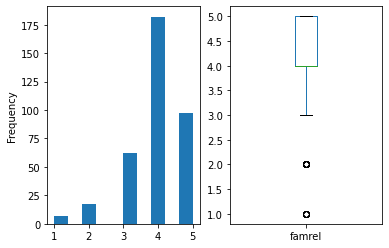

In [252]:
# distribution and otliers check
figure, axes = plt.subplots(1, 2)
children.famrel.plot(ax=axes[0], kind='hist')
children.famrel.plot(ax=axes[1], kind='box')
children.famrel.describe()

And what to do with this? I see here distribution and outliers. But data are categorical, so let's leave it as it is.

In [253]:
# just out of curiosity, let's check for outliers:
Q1 = children.famrel.quantile(0.25)
Q3 = children.famrel.quantile(0.75)
IQR = Q3 - Q1
children[(children.famrel > Q3 + 1.5*IQR) | (children.famrel < Q1 - 1.5*IQR)]
#yep, there are 24 of them

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,studytime_gr,higher,internet,romantic,famrel,freetime,goout,health,absences,score
27,GP,M,15,U,GT3,T,4.0,2.0,health,services,...,-3.0,yes,yes,yes,2.0,2.0,4.0,1.0,4.0,75.0
37,GP,M,16,R,GT3,A,4.0,4.0,other,teacher,...,-9.0,yes,yes,yes,2.0,4.0,3.0,5.0,7.0,75.0
46,GP,F,16,U,LE3,A,3.0,1.0,other,services,...,-6.0,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
60,GP,F,16,R,GT3,T,4.0,4.0,health,teacher,...,-6.0,yes,no,no,2.0,4.0,4.0,4.0,6.0,55.0
66,GP,M,15,U,GT3,A,4.0,4.0,other,services,...,-12.0,yes,yes,yes,1.0,3.0,3.0,3.0,4.0,60.0
79,GP,F,16,U,GT3,T,3.0,4.0,at_home,other,...,-6.0,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
108,GP,M,15,R,GT3,T,4.0,4.0,other,other,...,-12.0,yes,yes,yes,1.0,3.0,5.0,1.0,6.0,65.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,...,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
141,GP,M,16,U,LE3,T,2.0,2.0,services,services,...,-3.0,yes,yes,no,2.0,3.0,3.0,2.0,8.0,45.0
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,...,-3.0,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0


In [254]:
# conversion
fillna_cat(children, column)
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  392 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
None


,famrel
4.0,196
5.0,103
3.0,67
2.0,18
1.0,8


0 samples with NaNs


## Freetime

In [255]:
column = next(child_iter)
print(column)
# before conversion with fillna_cat
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

freetime
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  381 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
None


,freetime
3.0,153
4.0,111
2.0,61
5.0,38
1.0,18


11 samples with NaNs


In [256]:
# after conversion
fillna_cat(children, column)
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  392 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
None


,freetime
3.0,156
4.0,115
2.0,63
5.0,40
1.0,18


0 samples with NaNs


## Goout

In [257]:
column = next(child_iter)
print(column)
# before conversion with fillna_cat
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

goout
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   384 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
None


,goout
3.0,127
2.0,99
4.0,84
5.0,51
1.0,23


8 samples with NaNs


In [258]:
# after conversion
fillna_cat(children, column)
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   392 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
None


,goout
3.0,131
2.0,101
4.0,86
5.0,51
1.0,23


0 samples with NaNs


## health

In [259]:
column = next(child_iter)
print(column)
# before conversion with fillna_cat
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

health
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  377 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
None


,health
5.0,137
3.0,89
4.0,62
1.0,46
2.0,43


15 samples with NaNs


In [260]:
# after conversion
fillna_cat(children, column)
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  392 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
None


,health
5.0,143
3.0,92
4.0,64
1.0,47
2.0,46


0 samples with NaNs


## absences

In [261]:
column = next(child_iter)
print(column)
# before conversion with fillna_cat
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

absences
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  380 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
None


,absences
0.0,111
2.0,60
4.0,52
6.0,31
8.0,21
10.0,17
12.0,12
14.0,11
3.0,8
16.0,6


12 samples with NaNs


In [262]:
Q1 = children[column].quantile(0.25)
Q3 = children[column].quantile(0.75)
IQR = Q3 - Q1
print(f'{len(children[(children[column] > Q3 + 1.5*IQR) | (children[column] < Q1 - 1.5*IQR)].index)} children children are out of range.')

17 children children are out of range.


Math is usually 2-3 times per week, Standard school year is 40 weeks. So number of math lessons is around:

In [263]:
print(f'Math lessons per year: {3 * 40}')

Math lessons per year: 120


25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


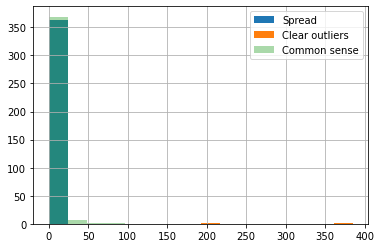

In [264]:
# visualisation

print(f'25-й перцентиль: {Q1},', f'75-й перцентиль: {Q3},'
      , f"IQR: {IQR}, ",f"Границы выбросов: [{Q1 - 1.5*IQR}, {Q3 + 1.5*IQR}].")

children.absences.loc[children.absences.between(Q1 - 1.5*IQR, Q3 + 1.5*IQR)].hist(bins = 16
                                                                                  , range = (0, 385), label = 'Spread')
children.absences.loc[children.absences > 120].hist(bins = 16, range = (0, 385),
                                                        label = 'Clear outliers')
children.absences.loc[children.absences.between(0, 121)].hist(alpha = 0.4, bins = 16, range = (0, 385), label = 'Common sense',)
plt.legend()

Well, obviously not really informative, let's use log scale and add more bins to improve data resolution.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


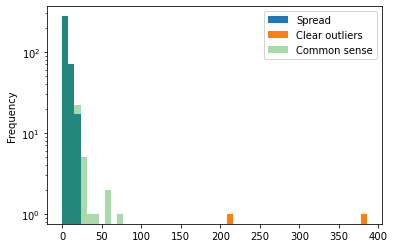

In [265]:
# visualisation

print(f'25-й перцентиль: {Q1},', f'75-й перцентиль: {Q3},'
      , f"IQR: {IQR}, ",f"Границы выбросов: [{Q1 - 1.5*IQR}, {Q3 + 1.5*IQR}].")
children.absences.loc[children.absences.between(Q1 - 1.5*IQR, Q3 + 1.5*IQR)].plot(kind = 'hist',bins = 50
                                                                                  , range = (0, 385), label = 'Spread', logy=True)
children.absences.loc[children.absences > 120].plot(kind = 'hist', bins = 50, range = (0, 385),
                                                        label = 'Clear outliers', logy=True)
children.absences.loc[children.absences.between(0, 121)].plot(kind = 'hist',alpha = 0.4, bins = 50, range = (0, 385), label = 'Common sense',
                                                             logy=True)
plt.legend()

Much better. If we take just spread - too many real slackers will be discarded. So I set abovementioned 120h as a border of the common sense. Let's make it our threshold and discard everything what's above.

In [266]:
children = children[(children[column].isna())|(children[column] <= 120)]

In [267]:
# and now conversion
fillna_cat(children, column)
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  390 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
None


,absences
0.0,114
2.0,62
4.0,52
6.0,33
8.0,24
10.0,18
12.0,12
14.0,11
3.0,9
7.0,6


0 samples with NaNs


Very nice!

## Score

In [268]:
column = next(child_iter)
print(column)
# before conversion with fillna_cat
print(children[[column]].info())
display(pd.DataFrame(children[column].value_counts()))
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

score
<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   384 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
None


,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
60.0,30
40.0,29
70.0,27
45.0,26
80.0,16


6 samples with NaNs


Ok, score is a critical value out here, so I don't feel like substituting NaN's with something they they are not. So here I just discard all NaN's (yes inconsistent I know). 

In [269]:
children = children[~children[column].isna()]
print(f'{len(children[children[column].isna()].index)} samples with NaNs')

0 samples with NaNs


Score is obviously from 0.0 to 100.0 with 5 points pace. All data are in proper format. Almost too good to be true.

## Let's check stuff about the most important column

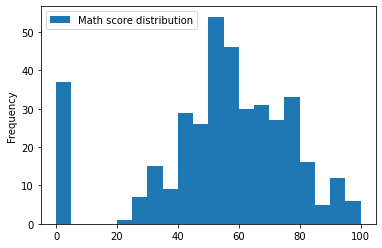

In [270]:
# visualisation

children.score.loc[children.score.between(0, 121)].plot(kind = 'hist', bins = 20, range = (0, 100), label = 'Math score distribution')
plt.legend()

Very interesting. We have two groups. Most of the distribution is normal and 0 creates a kind of peak. I'd say those, who were allowed to come for a final test, got something from 20 to 100, those who were not allowed, or didn't come because of different reason, got 0's.

In [271]:
Q1 = children[column].quantile(0.25)
Q3 = children[column].quantile(0.75)
IQR = Q3 - Q1
print(f'{len(children[(children[column] > Q3 + 1.5*IQR) | (children[column] < Q1 - 1.5*IQR)].index)} children children are out of range.')

0 children children are out of range.


So people with 0 are so numerous, that even not marked as outliers. Well ok. But let's modify our hist a bit anyway.

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


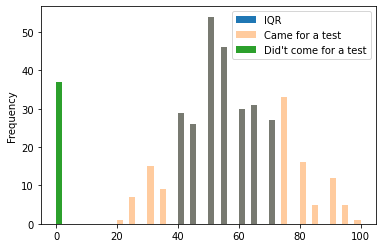

In [272]:
# visualisation

print(f'25-й перцентиль: {Q1},', f'75-й перцентиль: {Q3},'
      , f"IQR: {IQR}, ",f"Границы выбросов: [{Q1 - 1.5*IQR}, {Q3 + 1.5*IQR}].")
children.score.loc[children.score.between(Q1, Q3)].plot(kind = 'hist',bins = 50
                                                                                  , range = (0, 100), label = 'IQR')
children.score.loc[children.score > 0].plot(alpha = 0.4, kind = 'hist', bins = 50, range = (0, 100),
                                                        label = 'Came for a test')
children.score.loc[children.score == 0].plot(kind = 'hist', bins = 50, range = (0, 100), label = "Did't come for a test")
plt.legend()

## Correlation analysis

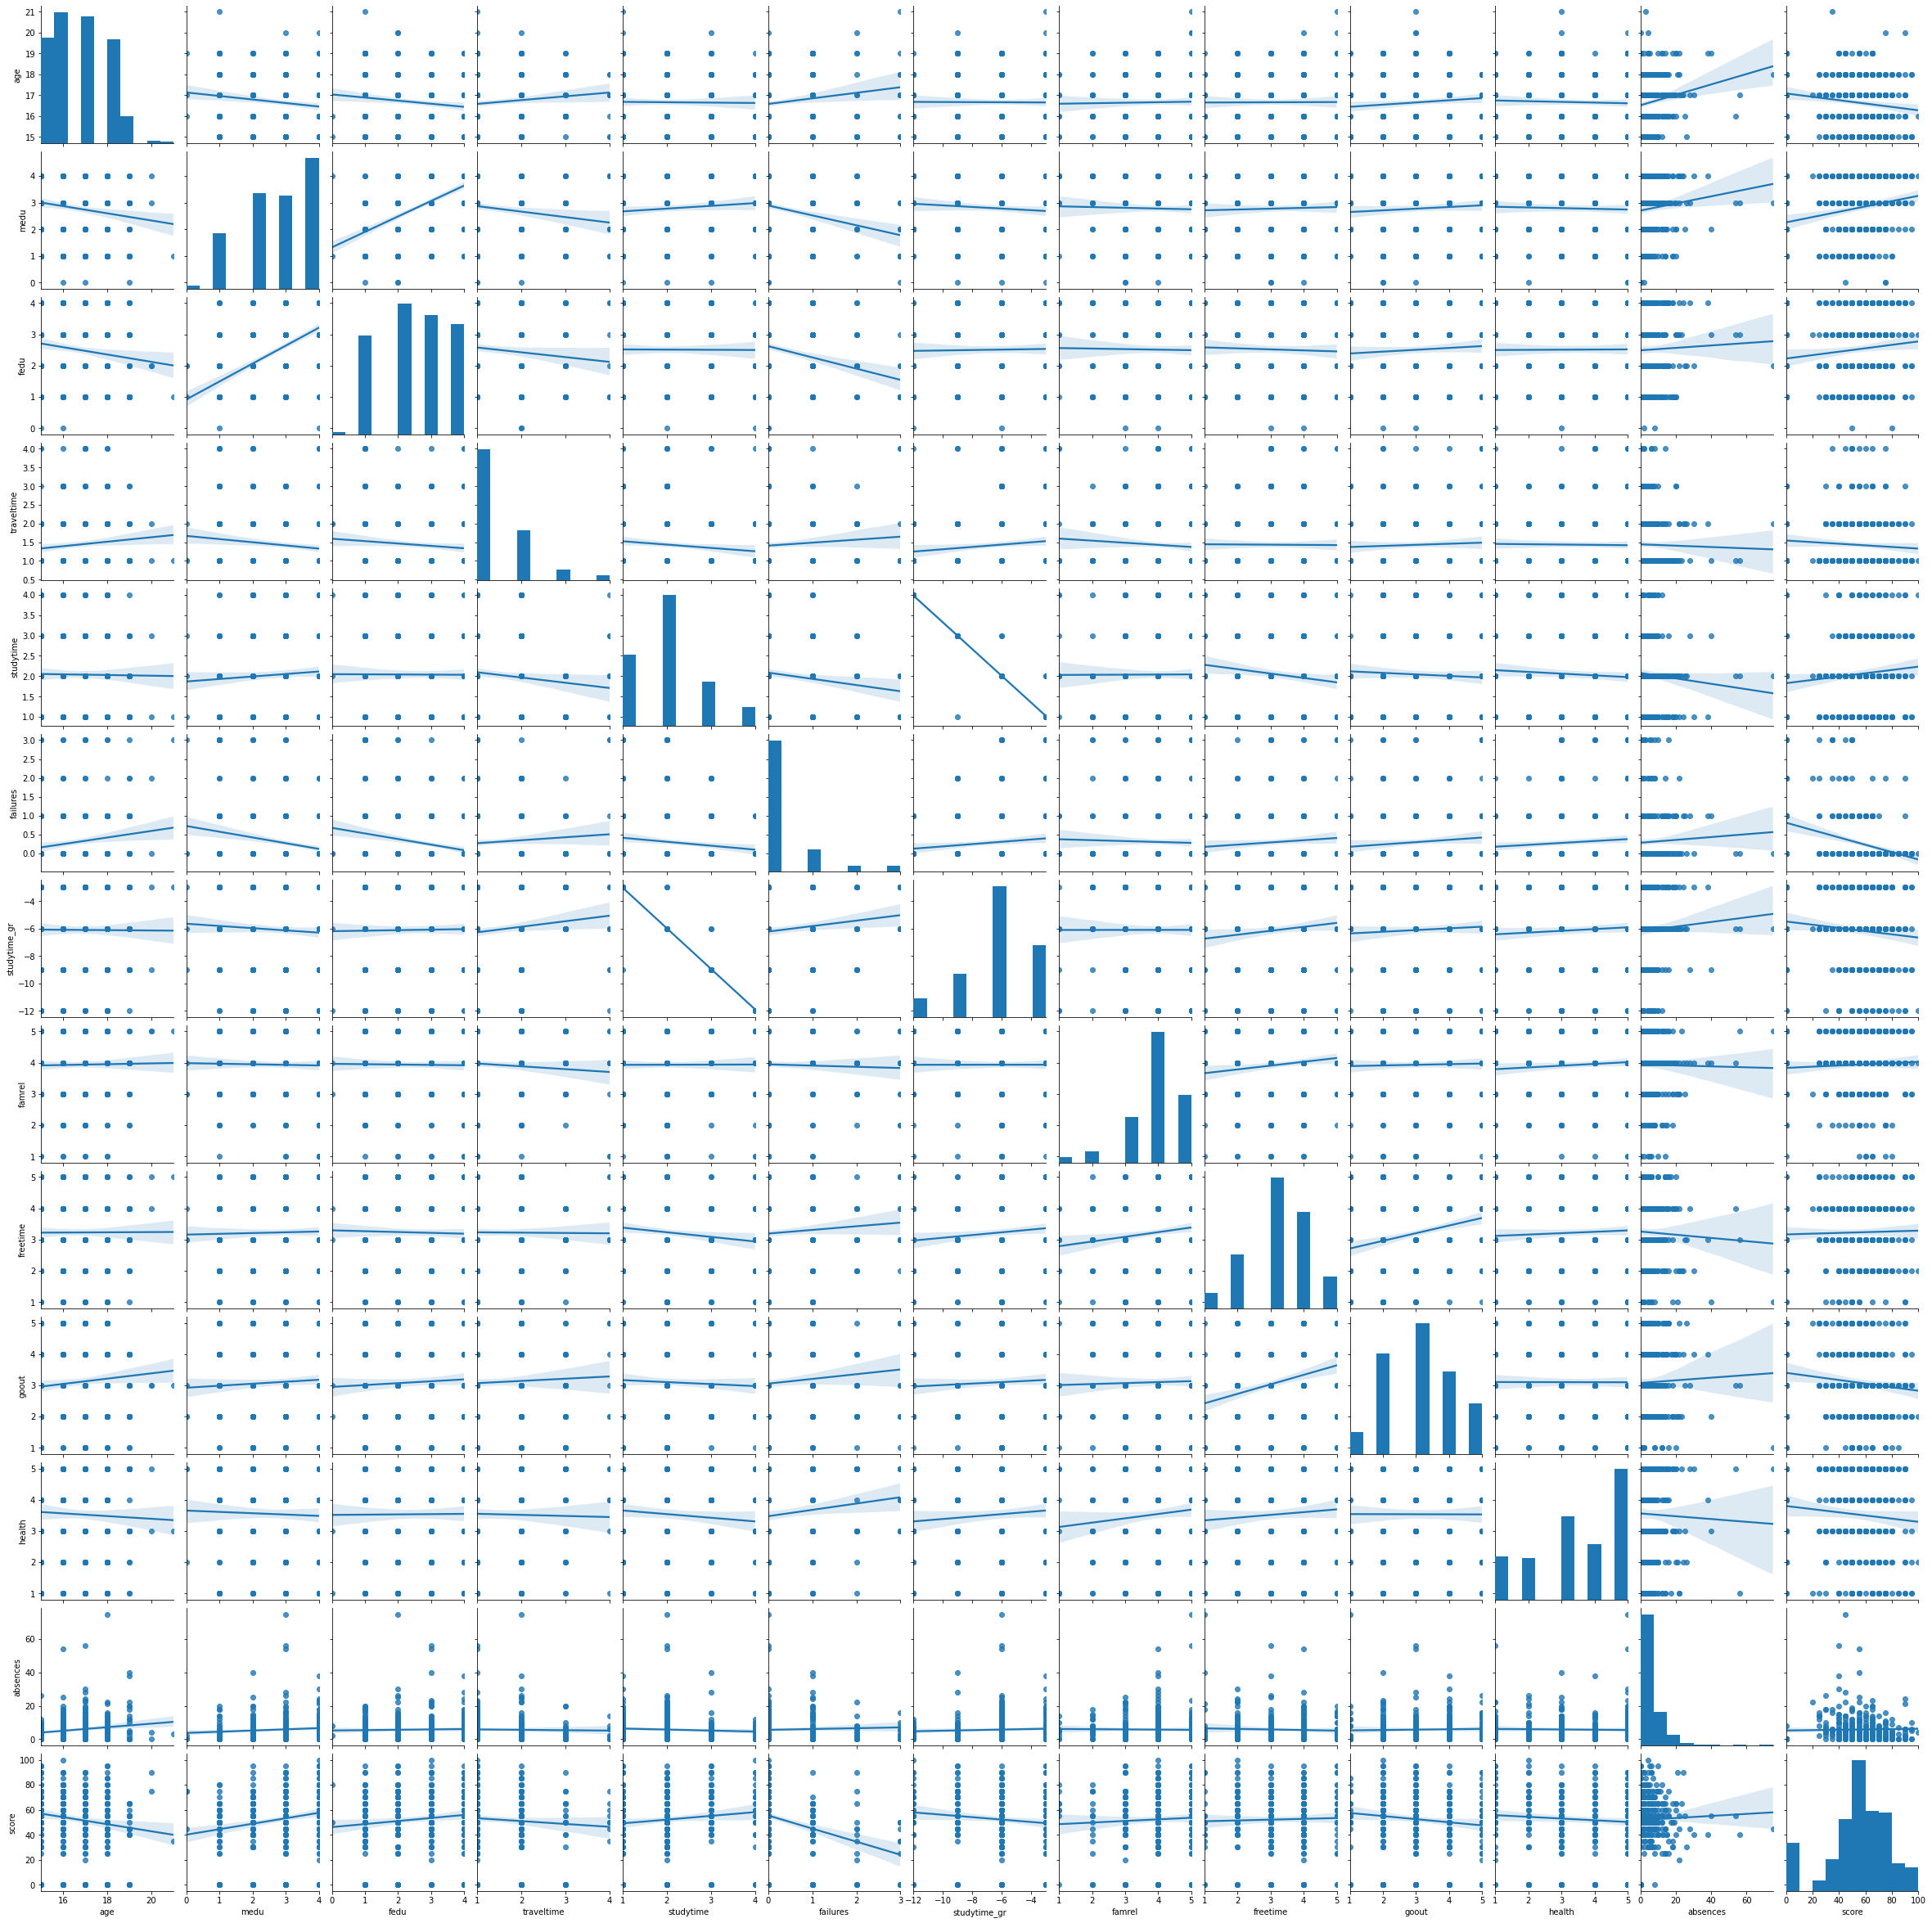

In [273]:
sns.pairplot(children, kind = 'reg')

Holly cow... Not digestable at all.
Let's check it with a heatmap:

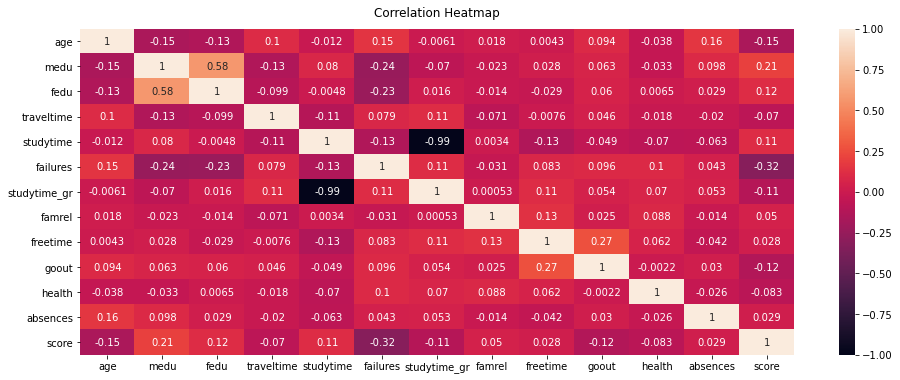

In [274]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(children.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Better, but still too many values, let's narrow it down to the correlation values >= 0.1 (corr to 'score') (we also include negative correlation):

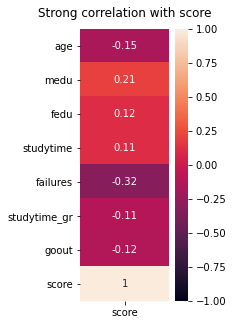

In [275]:
plt.figure(figsize=(2, 5))
heatmap = sns.heatmap(pd.DataFrame(children.corr().loc[children.corr()['score'].abs() >= 0.1, 'score']), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Strong correlation with score', fontdict={'fontsize':12}, pad=12);

### Well, let's do some assumptions:
- Age **(-0.15)** - weak negative correlation. May be logical - small children are more diligent than older ones;
- Mother's education **(0.22)** - some positive correlation. I'd say totally logical - educated mother inspire children to learn;
- Father's education **(0.12)** - weak positive correlation. Weaker than with mother's education, but logic is the same. *P.S*. Correlation may be 2x weaker, because 2-times more children live only with mother, than only with father (guardian column);
- Study time **(0.1)** - weak positive correlation. More study time - better results. In fact, it's really fascinating to find this correlation so weak;
- Failures **(0.33)** - moderate negative correlation. Logical, less failures - higher motivation;
- Study time granular **(-0.11)** - I have no idea what this column represents. It has an almost 100% negative correlation with the ordinary study time. Conclusion - should be kicked out;
- Go out **(-0.1)** - weak negative correlation. Confirmation that next-door neighbor will never teach you any good;
- Rest variables are not strongly correlated with 'score' and can be discarded: 

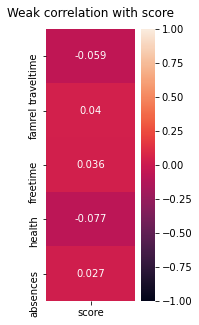

In [177]:
plt.figure(figsize=(2, 5))
heatmap = sns.heatmap(pd.DataFrame(children.corr().loc[children.corr()['score'].abs() < 0.1, 'score']), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Weak correlation with score', fontdict={'fontsize':12}, pad=12);

In [276]:
# discarding weakly correlated columns + studytime_granular
drop_list = list(pd.DataFrame(children.corr().loc[children.corr()['score'].abs() < 0.1, 'score']).index)
drop_list.append('studytime_gr')

for i in drop_list:   
    children.drop(i, inplace = True, axis = 1)

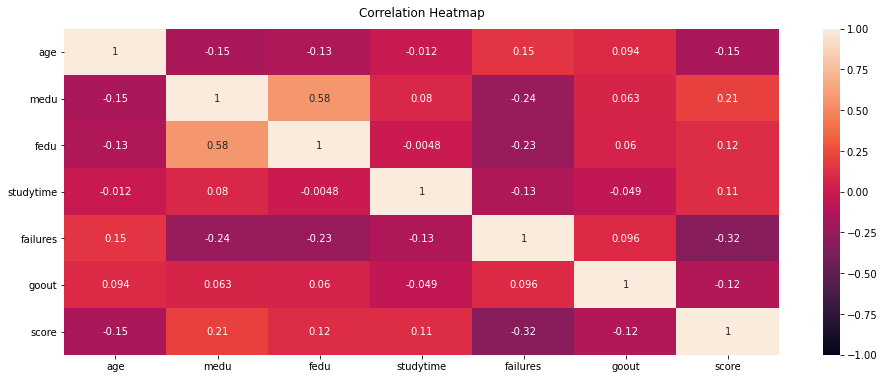

In [277]:
# checking out new correlation heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(children.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Nominative data analysis

In [340]:
# let's steal get_boxplot function from the example EDA and update it a bit(we dodn't need to select only 10 first values):

def get_boxplot(col):
    fig, ax = plt.subplots(figsize = (10, 4))
    sns.boxplot(x=col, y='score', 
                data=children, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + col)
    plt.show()

['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


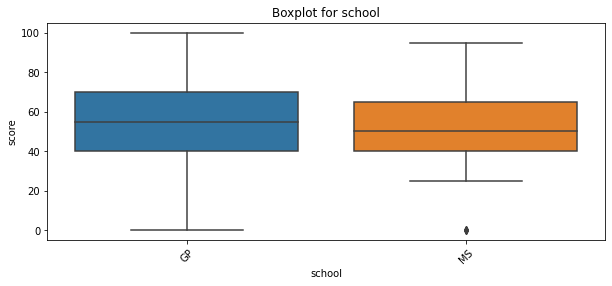

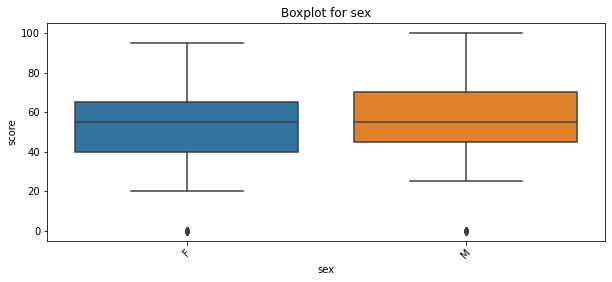

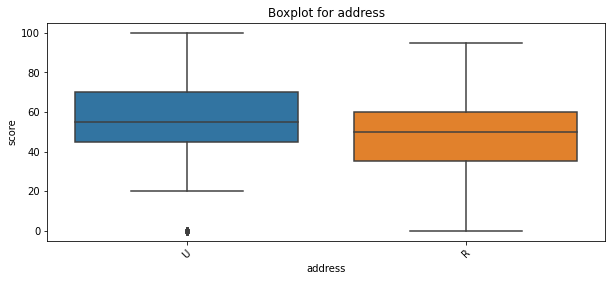

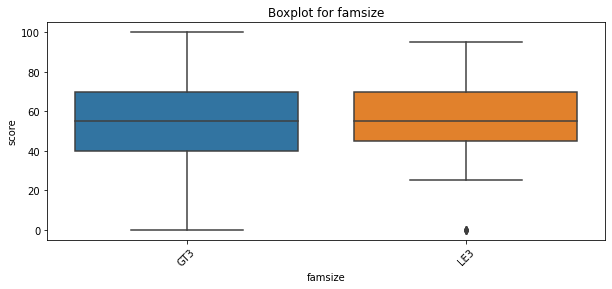

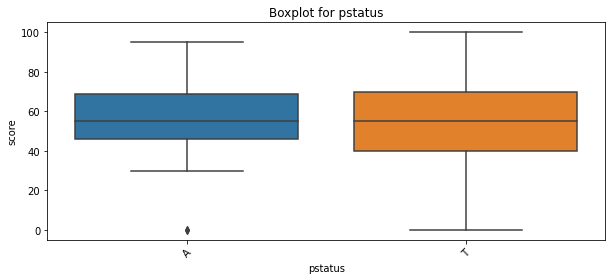

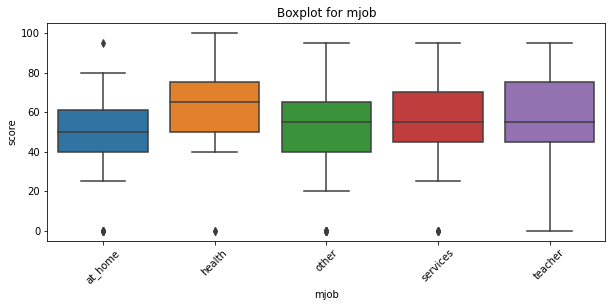

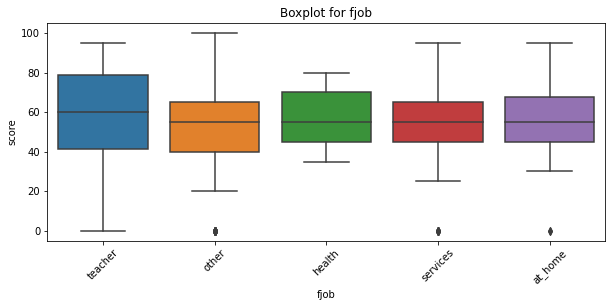

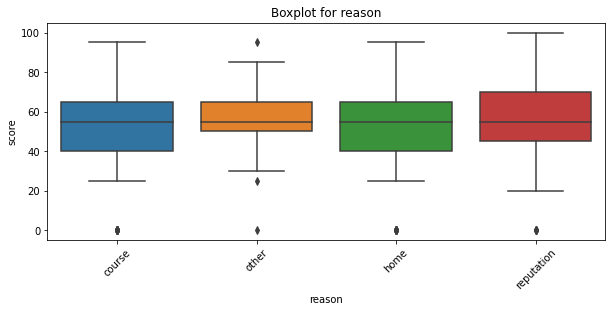

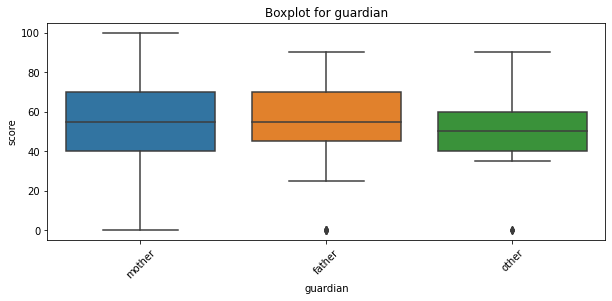

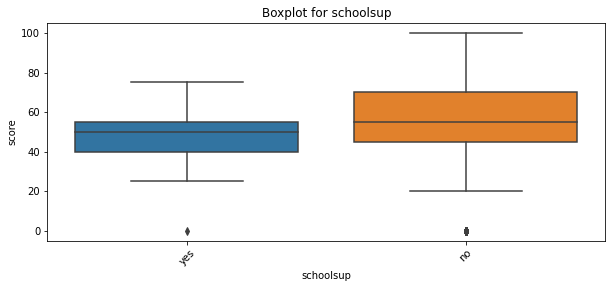

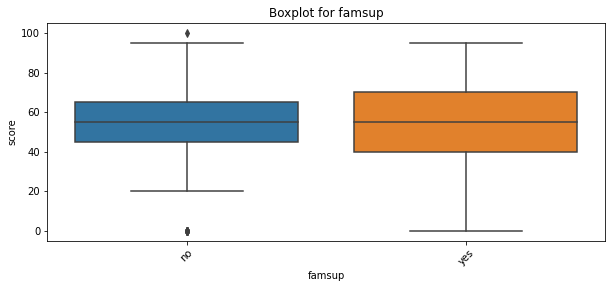

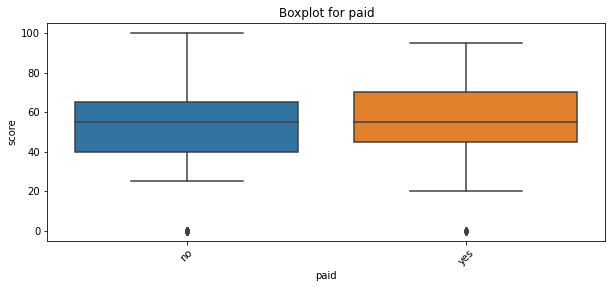

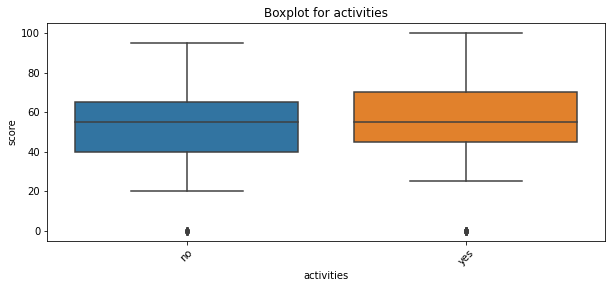

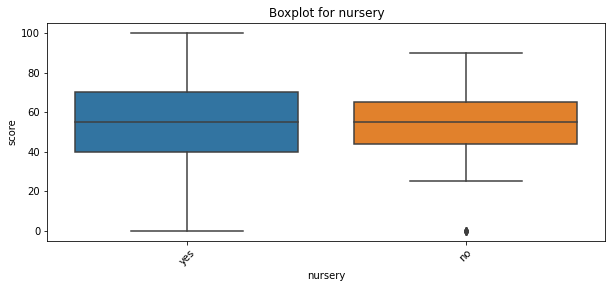

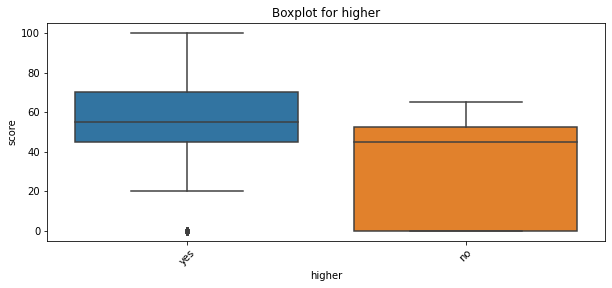

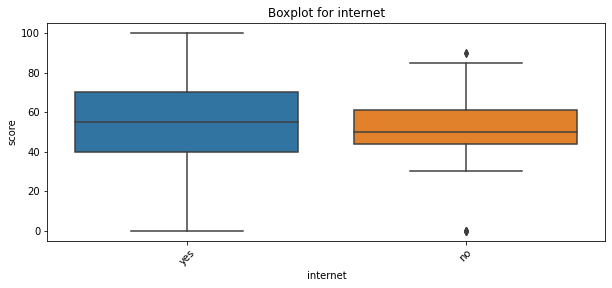

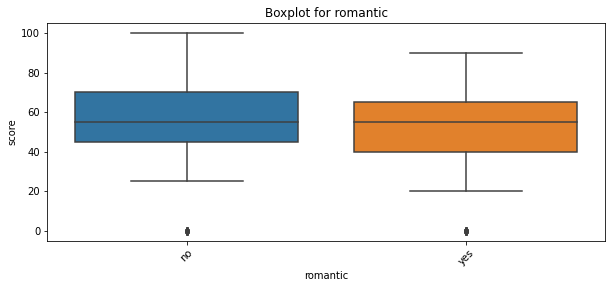

In [342]:
# list of columns, which were already analyzed
analyzed_col = list(pd.DataFrame(children.corr().loc[children.corr()['score'].abs() >= 0.1, 'score']).index)
# all columns
all_col = list(children.columns)
# only nominative columns
nominative_col = [i for i in all_col if i not in analyzed_col]
print(nominative_col)
for x in nominative_col:
    get_boxplot(x)

From these plots I can only see some correlation between score and children's plans to get higher education.
Let's go through the statistical tests.

In [386]:
def get_stat_dif(col):
    # again just stolen from the chocolate EDA
    cols = children.loc[:, col].value_counts().index
    combinations_all = list(combinations(cols, 2))
    # we have somewhere just combination of two options, in this case we don't need Bonferoni correction
    if len(combinations_all) > 1:
        bonferoni_corr_coeff = len(combinations_all)
    else:
        bonferoni_corr_coeff = 1
        
    for comb in combinations_all:
        if ttest_ind(children.loc[children.loc[:, col] == comb[0], 'score'], 
                        children.loc[children.loc[:, col] == comb[1], 'score']).pvalue \
            <= 0.05/bonferoni_corr_coeff: # Учли поправку Бонферони
            return col    # will help us to autobmatically generate a list with significant data

In [387]:
sign_list = []
for col in nominative_col:
    if get_stat_dif(col) != None:
        sign_list.append(get_stat_dif(col))
print(f'Following columns are statistically significant: {sign_list}')

Following columns are statistically significant: ['sex', 'address', 'mjob', 'paid', 'higher', 'romantic']


Nice, the rest should be cut out:

In [388]:
nominative_to_discard = [i for i in nominative_col if i not in sign_list]
print(f'These columns will be discarded as insignificant: {nominative_to_discard}')


These columns will be discarded as insignificant: ['school', 'famsize', 'pstatus', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'activities', 'nursery', 'internet']


In [389]:
for j in nominative_to_discard:   
    children.drop(j, inplace = True, axis = 1)
children.head()

,sex,age,address,medu,fedu,mjob,studytime,failures,paid,higher,romantic,goout,score
0,F,18,U,4.0,4.0,at_home,2.0,0.0,no,yes,no,4.0,30.0
1,F,17,U,1.0,1.0,at_home,2.0,0.0,no,yes,no,3.0,30.0
2,F,15,U,1.0,1.0,at_home,2.0,3.0,no,yes,yes,2.0,50.0
3,F,15,U,4.0,2.0,health,3.0,0.0,yes,yes,yes,2.0,75.0
4,F,16,U,3.0,3.0,other,2.0,0.0,yes,yes,no,2.0,50.0


Cool, we shortened the thing qite a bit, right? Looks like something waaay more digestable now.

## Conclusions:
- There are quite some empty values in the children dataframe, most of them were filled with fillna_cat() function. A detailed description of the function you can find in the very beginning of the notebook;
- Outliers are very rare, most of them are probably just technical mistypes. All outliers were discarded;

## Following columns were selected as significant for the further model building:

### Conclusions about numerical data correlations :

- `Age` **(-0.15)** - weak negative correlation. May be logical - small children are more diligent than older ones;
- `medu`(Mother's education) **(0.22)** - some positive correlation. I'd say totally logical - educated mother inspire children to learn;
- `fedu`(Father's education) **(0.12)** - weak positive correlation. Weaker than with mother's education, but logic is the same. *P.S*. Correlation may be 2x weaker, because 2-times more children live only with mother, than only with father (guardian column);
- `studytime` **(0.1)** - weak positive correlation. More study time - better results. In fact, it's really fascinating to find this correlation so weak;
- `failures` **(0.33)** - moderate negative correlation. Logical, less failures - higher motivation;
- `goout` **(-0.1)** - weak negative correlation. Confirmation that next-door neighbor will never teach you any good;

***Some numerical data are in fact 'hidden' nominatives, where numbers ( for example  `health` from 0 to 5) just encode some nominative data, for such columns I checked outliers just by common sense (if the value is out of 0-5 range) and didn't build distribution graph - what for?***

### Conclusions about nominative data significant differences:
- `Sex` - fascinating, didn't expect to find a difference here, but ok;
- `Address` - unfortunately not surprising. Overall urban schools are known to have better study quality;
- `mjob` (mother Job) - as we saw from numerical data, mother's education level correlates with the 'score', so not surprisingly, mother's job as well;
- `paid` - paid lessons are not completely pointless, the difference is not drastic, though;
- `higher` - those who want to go to college study better;
- `romantic` - it steals some time from study obviously.